# 

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >130 | <1200 | >50% |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as matplot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


#### Read in the EColiHorizons dataset into the variable df. Once successful, the df.head() command should match the one below (1 mark)

In [2]:
df = pd.read_csv('EColiHorizons.csv')
df.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural


#### Plot the log(EColi count) over time for the Arawhata Drain at Hokio Beach Road and Manawatu at u/s PNCC STP
#### Make sure that you get the labels on the x axis to be useful (2 marks)

First, convert the date into a datetime format to make the labels usable and also allow for later data exploration

In [3]:
df['datetime'] = pd.to_datetime(df['Date'])
df['Day'] = df['datetime'].apply(lambda x: x.strftime('%d/%m/%Y'))
df['Month'] = df['datetime'].apply(lambda x: x.strftime('%m/%Y'))
df['Year'] = df['datetime'].apply(lambda x: x.strftime('%Y'))
df.head()

,Location,Test,Date,Count,Land height,Land type,datetime,Day,Month,Year
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural,2006-01-02 09:45:00,02/01/2006,01/2006,2006
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural,2006-01-03 10:10:00,03/01/2006,01/2006,2006
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural,2006-03-22 11:05:00,22/03/2006,03/2006,2006
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural,2006-05-24 10:45:00,24/05/2006,05/2006,2006
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural,2006-06-27 11:20:00,27/06/2006,06/2006,2006


Next, add the log of the counts to the DF as a column

In [4]:
df['logCount'] = np.log(df['Count'])

Now sort the dataframe according to the datetime, then plot the line for both arawhata drain and for manawatu

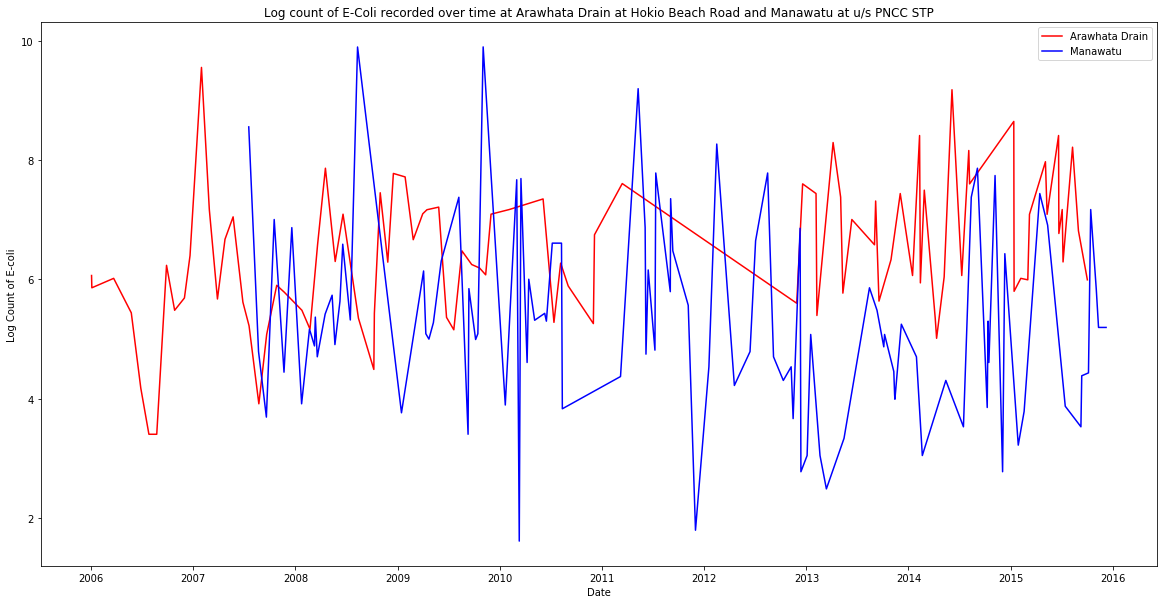

In [5]:
plt.figure(figsize=(20,10))

df = df.sort_values('datetime', ascending=True)
plt.plot(df[df.Location=='Arawhata Drain at Hokio Beach Road'].datetime,df[df.Location=='Arawhata Drain at Hokio Beach Road'].logCount,'r-')
plt.plot(df[df.Location=='Manawatu at u/s PNCC STP'].datetime,df[df.Location=='Manawatu at u/s PNCC STP'].logCount,'b-')

plt.xlabel('Date')
plt.ylabel('Log Count of E-coli')
plt.title('Log count of E-Coli recorded over time at Arawhata Drain at Hokio Beach Road and Manawatu at u/s PNCC STP')
plt.legend(['Arawhata Drain', 'Manawatu'])


#### Explore the data.
#### Summarise it and report back about it.

#### You might want to identify:
- how many sites there are 
- how often they were sampled
- what the range of observations is between the sites
- how many different types of site there are by land properties

#### (2 marks)


To see how many sites there are, first identify all of the unique sites in the location column, then use nunique to count them

In [6]:
df['Location'].unique()

array(['Arawhata Drain at Hokio Beach Road', 'Hokio at Lake Horowhenua',
       'Rangitikei at Pukeokahu', 'Hautapu at Alabasters',
       'Hautapu at US Rangitikei River Conf', 'Rangitikei at Mangaweka',
       'Rangitikei at Onepuhi', 'Rangitikei at McKelvies',
       'Mowhanau Stream at Footbridge', 'Whanganui at Cherry Grove',
       'Manawatu at Whirokino', 'Ohau at Haines Property',
       'Ohau at Gladstone Reserve', 'Tokomaru River at Horseshoe bend',
       'Oroua at Awahuri Bridge', 'Pohangina at Mais Reach',
       'Pohangina at Piripiri', 'Oroua at Almadale Slackline',
       'Mangawhero at DOC Headquarters', 'Makotuku at SH49A',
       'Whanganui at Pipiriki', 'Mangawhero at Pakihi Rd Bridge',
       'Manawatu at Upper Gorge', 'Mangapapa at Troup Rd',
       'Manawatu at Hopelands', 'Mangatera at u/s Manawatu confluence',
       'Manawatu at Weber Road', 'Tamaki at Tamaki Reserve',
       'Mangahao at Ballance', 'Mangatainoka at Brewery - S.H.2 Bridge',
       'Mangatainok

In [7]:
df['Location'].nunique()

85

From this we can identify that there are 85 unique locations/sites in the data


Next, to find the range of the counts within the sites, take the minimum and maximum of the count column, subtracting min from max to get the range. Also describe the statistics of the column and plot it on a boxplot for easy visualisation

In [8]:
minimum = df['Count'].min()
maximum = df['Count'].max()
ranges = maximum - minimum
print(ranges)
df['Count'].describe()

198629.0


count      8596.000000
mean       1111.911953
std        5629.125722
min           1.000000
25%          53.000000
50%         152.000000
75%         488.000000
max      198630.000000
Name: Count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2922279acf8>,
 'caps': [<matplotlib.lines.Line2D at 0x292227a75f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2922279aba8>],
 'medians': [<matplotlib.lines.Line2D at 0x292227a7e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292227af2b0>],
 'means': []}

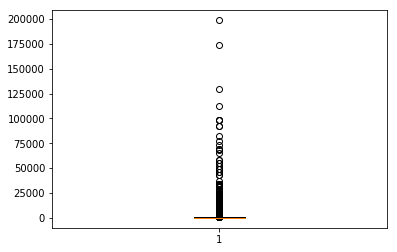

In [9]:
plt.boxplot(df['Count'])

From this we can see that the minimum count of E-Coli identified at a site is 1, and the maximum is 198630
This gives a range of 198629


Next, identify the types of land properties by identifying the unique land type-land height pairings within the table

In [10]:
#Extract all pairings of land type and land height, then delete duplicates to get the unique pairings
a = df.filter(like='Land type').values.T.ravel()
b = df.filter(like='Land height').values.T.ravel()
land_df = pd.DataFrame({'Land type':a, 'Land height':b}, columns=['Land type','Land height'])
land_df.drop_duplicates(inplace=True)
land_df

,Land type,Land height
0,Rural,Lowland
4,Forest,Upland
5,Rural,Upland
14,Forest,Lowland


Lastly, to find out how often the sites were measured:

First, identify the range of years and months that the sites were measured during
Next to get the number of times a year the sites are sampled, divide the number of times the sites were measured in their unique month-year pairings, then divide by the number of years


In [11]:
#First, extract the number of unique month-year pairings, then get the start and end year
unique_month_year = df['Month'].nunique()
unique_year = df['Year'].nunique()
start_year = df['Year'].min()
end_year = df['Year'].max()

#Use integer division. While it can lose some information, in this example you cannot sample something 1.4 times a month. it is either sampled once a month, or twice, etc. 
#Thus using integer division gives a round number which makes more logical sense while giving an idea of how often the data was sampled
num_times_sampled = unique_month_year // unique_year

print('Total number of years sampled is ' + str(unique_month_year) + ' over the years from ' + str(start_year) + ' to ' + str(end_year))
print('This gives an average sampling per year of ' + str(num_times_sampled) + ' which works out to be ' + str(12//num_times_sampled) + ' a month')

Total number of years sampled is 120 over the years from 2006 to 2015
This gives an average sampling per year of 12 which works out to be 1 a month


#### For the two sites identified above, compute a linear fit to the log count of the data. Plot this trend line over the data and interpret it. Use np.polyfit to compute the line. Remember that you can find out about it with ?np.polyfit
(2 marks)

First, plot the dates-log counts pairings then find the trend lines for each data set based on location, then for the combined locations to see how the interaction can be measured

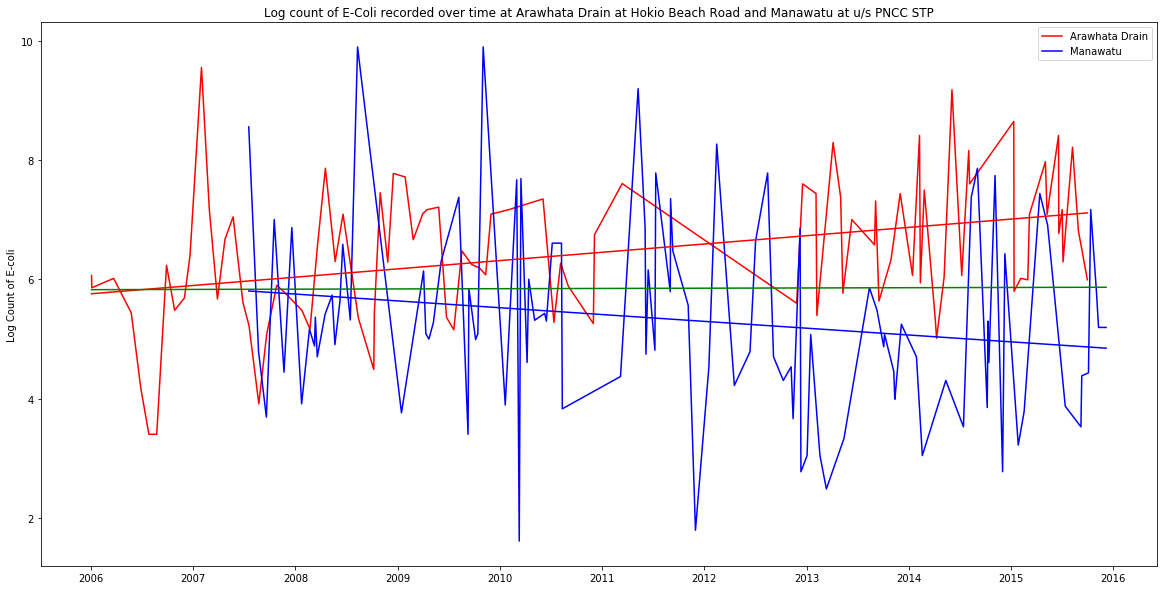

In [12]:
import datetime

# method to change all the dates to an integer number for use in the polyfit
def strip_time (row):
    day = row['Day']
    d = datetime.datetime.strptime(row['Day'], '%d/%m/%Y')
    int_date = matplot.date2num(d)
    return int_date

# Add a column made up of the time in integer that can be used
df['date_datetime'] = df.apply (lambda row: strip_time(row), axis=1)
df['date_datetime']

df.head()

#Plot the same graph as above in earlier question
plt.figure(figsize=(20,10))

df = df.sort_values('datetime', ascending=True)
plt.plot(df[df.Location=='Arawhata Drain at Hokio Beach Road'].date_datetime,df[df.Location=='Arawhata Drain at Hokio Beach Road'].logCount,'r-')
plt.plot(df[df.Location=='Manawatu at u/s PNCC STP'].date_datetime,df[df.Location=='Manawatu at u/s PNCC STP'].logCount,'b-')

plt.ylabel('Log Count of E-coli')
plt.title('Log count of E-Coli recorded over time at Arawhata Drain at Hokio Beach Road and Manawatu at u/s PNCC STP')
plt.legend(['Arawhata Drain', 'Manawatu'])

#Make the polyfit lines for f(x) = Arawhata, g(x) = Manawatu and fg(x) = both locations
x = df[df.Location=='Arawhata Drain at Hokio Beach Road'].date_datetime
a = df[df.Location=='Manawatu at u/s PNCC STP'].date_datetime

y =  df[df.Location=='Arawhata Drain at Hokio Beach Road'].logCount
b = df[df.Location=='Manawatu at u/s PNCC STP'].logCount

xy = np.polyfit(x, y, deg=1)
f = np.poly1d(xy)
ab = np.polyfit(a, b, deg=1)
g = np.poly1d(ab)

c = x.append(a)
d = y.append(b)
cd = np.polyfit(c, d, deg=1)
fg = np.poly1d(cd)

#Plot the calculated trendlines
plt.plot(x,f(x),'r')
plt.plot(a,g(a),'b')
plt.plot(c,fg(c),'g')
                         
#Change the axis to years instead of meaningless numbers for easy interpretation    
locator = matplot.AutoDateLocator()
ax = plt.axes()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter( matplot.AutoDateFormatter(locator) )


#### Interpret the results
(1 mark)

From this graph, which plots both of the two sites with their trend/regression line, we can see that the Ecoli recorded in the Manawatu area over time has gone down, while the EColi recorded at Arawhata Drain continues to grow. The combined regression line would suggest that there is no change in the number of E-Coli, showing how important it is to graph the two areas individually rather than taking an average of the two. The trend line also show an increase at Arawhata and decrease in Manawatu which may not be obvious from the oscillating data which has been plotted in the line graph

#### Discuss briefly the ethical implications of using this data, and not reporting what you discover. Also consider how this data could be used to perform monitoring of water quality in New Zealand. Is it sufficient? (2 marks)

The ethical implications of using this data and not reporting on the findings are multiple, but two stand out as the most obvious. If the data shows, as this has, that there is a trend for an increase in E-Coli over time not reporting this data could lead to a wide impact on many people as the deterioration in the water quality can lead to mass illness

There is also the side that if this data was not reported in cases where the E-Coli is reducing over time, then there is the disservice to other areas as if there is any treatment occuring to reduce the numbers of E-Coli then other areas may benefit from those same treatments.

As this data can affect public health, if the results are not reported in either direction it can impact a large number of people. Morally and ethically, the results should be reported even if they show no change at all, as at least the water quality is not deteriorating

This data could be used to monitor the water quality through the use of the trendline, as it shows the increase over time in the amount of E-Coli in the location of Arawhata Drain (as the example from this assignment). It can also show when E-Coli is decreasing in locations and be used to help other sites achieve the same results

This is not sufficient data though. This data does not take into account any treatments, the size of the areas measured, what type of E-Coli is most prevalent at a certain location for example, and it is also not asupdated as it could be. Data from 2016 is now 3 years old and thus the water quality could have changed greatly in that time. 

The data as it is now can give a very general guideline, but it makes a number of assumptions about data that would need further domain knowledge to know if they are accurate or not. While it can show a trend in the most basic sense, it is insufficient for any true monitoring of water quality.